# Case Study on Measures of Central Tendency and Dispersion
An Institution wishes to find out their student’s ability in maths, reading and
writing skills. The Institution wants to do an exploratory study to check the
following information.

In [1]:
#to ignore warnigs
import warnings
warnings.filterwarnings("ignore")

In [2]:
#including lib we needed
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
#reading data 
studentframe=pd.read_csv("StudentsPerformance.csv")

In [4]:
#printing frame
studentframe

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


In [6]:
#info of dataframe
studentframe.info

<bound method DataFrame.info of      gender race/ethnicity parental level of education         lunch  \
0    female        group C            some high school  free/reduced   
1    female        group B                 high school  free/reduced   
2    female        group B            some high school  free/reduced   
3    female        group B                some college      standard   
4    female        group C                some college  free/reduced   
..      ...            ...                         ...           ...   
995    male        group E                some college      standard   
996    male        group A                some college      standard   
997    male        group D                some college      standard   
998    male        group E          associate's degree  free/reduced   
999    male        group E           bachelor's degree      standard   

    test preparation course  math score  reading score  writing score  
0                      none    

# 1. Find out how many males and females participated in the test.

In [7]:
studentframe['gender'].value_counts().to_frame()

,gender
female,518
male,482


In [8]:
#checking presence of null value
studentframe.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# 2. What do you think about the students' parental level of education?

In [9]:
peducation=studentframe['parental level of education'].value_counts().to_frame()

In [10]:
#resultant dataframe with parental education
peducation

,parental level of education
some college,226
associate's degree,222
high school,196
some high school,179
bachelor's degree,118
master's degree,59


In [11]:
peducation.columns

Index(['parental level of education'], dtype='object')

Text(0.5, 1.0, 'count of parental education')

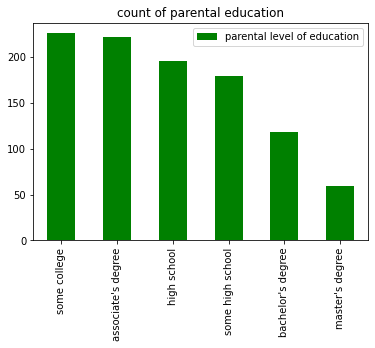

In [12]:
#bar graph showing parental education
peducation.plot.bar(color='green')
plt.title("count of parental education")

# 3. Who scores the most on average for math, reading and writing based on
● Gender
● Test preparation course

In [14]:
#gender wise mean score
studentframe.groupby(['gender'])['math score','writing score','reading score'].mean()

,math score,writing score,reading score
gender,,,
female,63.376448,72.467181,72.590734
male,68.821577,63.446058,65.545643


# test preperation wise mean score


In [35]:
studentframe.groupby(['test preparation course'])['math score','writing score','reading score'].mean()

,math score,writing score,reading score
test preparation course,,,
completed,69.96648,74.684358,74.175978
none,63.78972,64.457944,66.417445


In [18]:
#frame that shows mean score basd on both gender and test preperation course
studentframe.groupby(['gender','test preparation course'])['math score','writing score','reading score'].mean()

math score  writing score  reading score
gender test preparation course                                          
female completed                 67.108696      78.793478      77.375000
       none                      61.320359      68.982036      69.955090
male   completed                 72.988506      70.339080      70.793103
       none                      66.467532      59.551948      62.581169

# 4. What do you think about the scoring variation for math, reading and writing
based on
● Gender
● Test preparation course

In [19]:
#varience of math score gender wise
varidf=studentframe.groupby(['gender'])['math score','writing score','reading score'].var()

In [20]:
varidf

,math score,writing score,reading score
gender,,,
female,256.958593,220.369327,207.677438
male,211.889097,202.413924,200.211010


In [21]:
 #varience of math score test preperation wise
varidf1=studentframe.groupby(['test preparation course'])['math score','writing score','reading score'].var()

In [22]:
varidf1

,math score,writing score,reading score
test preparation course,,,
completed,210.884027,175.202612,183.265864
none,246.668662,226.251739,213.419851


<AxesSubplot:xlabel='test preparation course'>

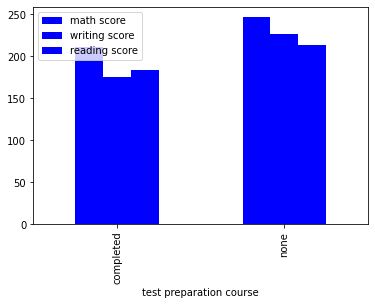

In [23]:
#bar plot of mark variation
varidf1.plot.bar(color='blue')

In [27]:
#finding varience in marks with std(standerd deviation)
sddf=studentframe.groupby(['gender','test preparation course'])['math score','writing score','reading score'].std()

In [28]:
sddf

math score  writing score  reading score
gender test preparation course                                          
female completed                 14.428233      12.240788      12.695493
       none                      16.510686      15.016497      14.636981
male   completed                 14.039164      12.887910      13.612420
       none                      14.335746      13.468284      13.595718

# 5. The management needs your help to give bonus points to the top 25% of
students based on their maths score, so how will you help the management
to achieve this.

In [34]:
#top 25% math scorers from dataset
mathhighdf=studentframe.sort_values(by=['math score'],ascending=False).head(250)

In [33]:
mathhighdf

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
999,male,group E,bachelor's degree,standard,completed,100,100,100
996,male,group A,some college,standard,completed,100,96,86
515,female,group E,some college,standard,none,100,92,97
517,female,group E,associate's degree,standard,none,100,100,100
516,female,group E,bachelor's degree,standard,none,100,100,100
...,...,...,...,...,...,...,...,...
856,male,group E,some high school,standard,completed,77,76,77
855,male,group E,associate's degree,free/reduced,completed,77,69,68
854,male,group D,some high school,standard,completed,77,68,69
853,male,group D,associate's degree,free/reduced,none,77,78,73
